In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
style.use('ggplot')
%matplotlib inline

In [6]:
#temperatures = pkl.load(open('data/output/temperatures_LR_0.1_GAMMA_0.99.pkl', "rb"))
temperatures = pkl.load(open('data/output/temperatures0.1_G_0.99_EPS_0.2_cycle_.pkl', "rb"))

temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-1]
temperatures_df['untrained'] = temperatures[0]
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='s')


In [7]:
temperatures_df.index = temperatures_df['hour']

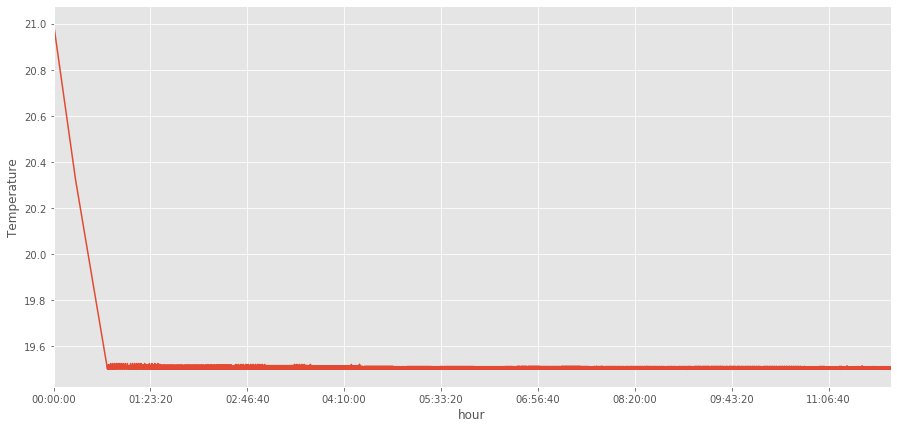

In [8]:
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature')
temperatures_df.loc[:,'trained'].plot(ax=ax)

plt.savefig('data/output/temperatures_cycle_constraint.png')

In [2]:
#rewards = pkl.load(open('data/output/rewards_LR_0.1_GAMMA_0.99.pkl', "rb"))
rewards = pkl.load(open('data/output/rewards_LR_0.1_G_0.99_EPS_0.2_cycle_.pkl', "rb"))

rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards

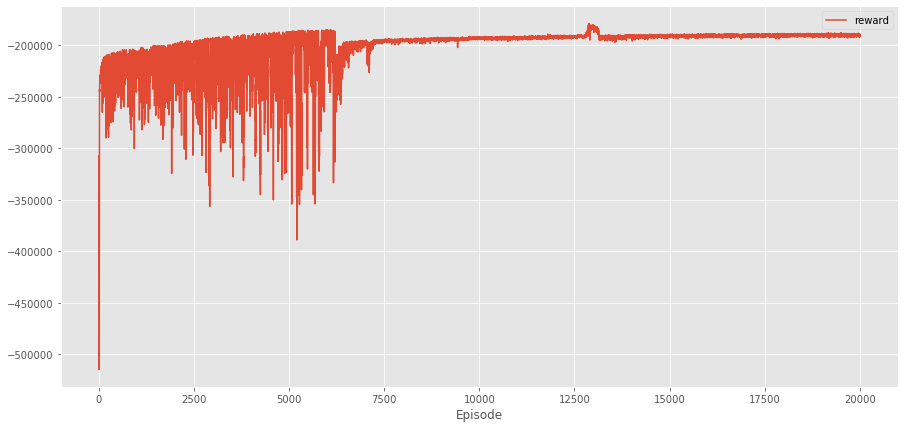

In [5]:
f, ax = plt.subplots(figsize=(15,7))
rewards_df.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_cycle_constraint.png')

In [4]:
rewards[-1]

-190420

In [49]:
temperatures = pkl.load(open('data/output/temperatures_basic.pkl', "rb"))

temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='s')

In [50]:
temperatures_df.index = temperatures_df['hour']

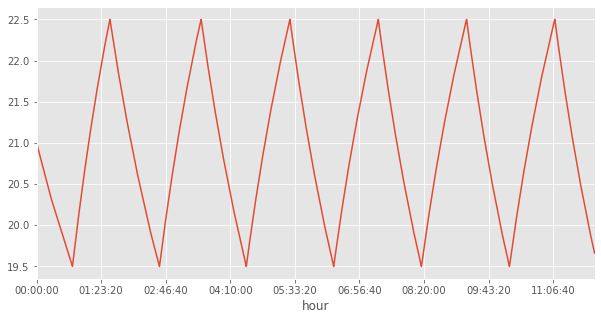

In [27]:
plt.figure(figsize=(10,5))
temperatures_df.loc[temperatures_df['hour'] < pd.to_timedelta(43200, unit='s'),'trained'].plot()

In [ ]:
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature')
temperatures_df['trained'].plot(ax=ax)

plt.savefig('data/output/temperatures_basic_controller.png')

In [53]:
rewards = pkl.load(open('data/output/rewards_basic.pkl', "rb"))

rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards

In [54]:
sum(rewards)

-199710

# The learned policy 

In [56]:
q_table = pkl.load(open('q_table_no_cycle.pkl', "rb"))

In [61]:
import numpy as np
policy = {k: np.argmax(v) for k, v in q_table.items()} 

In [68]:
for t in np.arange(19.5, 23, 1/10):
    print('Temperature {} --> action {}'.format(np.round(t, decimals = 1),policy[np.round(t, decimals = 1)]))

Temperature 19.5 --> action 1
Temperature 19.6 --> action 0
Temperature 19.7 --> action 0
Temperature 19.8 --> action 1
Temperature 19.9 --> action 0
Temperature 20.0 --> action 0
Temperature 20.1 --> action 0
Temperature 20.2 --> action 0
Temperature 20.3 --> action 0
Temperature 20.4 --> action 0
Temperature 20.5 --> action 0
Temperature 20.6 --> action 0
Temperature 20.7 --> action 0
Temperature 20.8 --> action 0
Temperature 20.9 --> action 0
Temperature 21.0 --> action 0
Temperature 21.1 --> action 1
Temperature 21.2 --> action 0
Temperature 21.3 --> action 1
Temperature 21.4 --> action 1
Temperature 21.5 --> action 0
Temperature 21.6 --> action 1
Temperature 21.7 --> action 1
Temperature 21.8 --> action 0
Temperature 21.9 --> action 0
Temperature 22.0 --> action 1
Temperature 22.1 --> action 0
Temperature 22.2 --> action 1
Temperature 22.3 --> action 0
Temperature 22.4 --> action 0
Temperature 22.5 --> action 1
Temperature 22.6 --> action 0
Temperature 22.7 --> action 0
Temperatur

# DQN Agent

## No dynamic outside parameters

In [23]:
rewards = pkl.load(open('data/output/basic/3163795_dynamic_False_rewards_dqn.pkl', "rb"))

In [24]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 10}

In [25]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [29]:
r = rewards_df.fillna(rewards_df.mean())

In [30]:
moving_avg = r.rolling(window=10).mean()

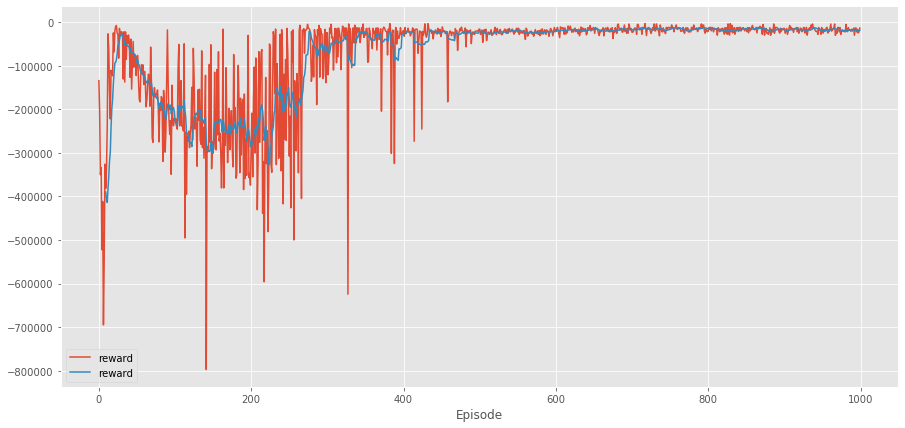

In [31]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_not_dynamic_dqn.png')

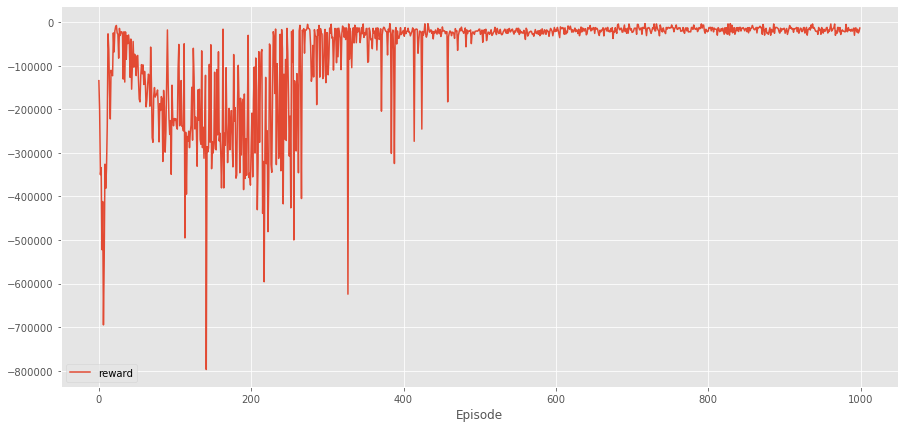

In [26]:
f, ax = plt.subplots(figsize=(15,7))
rewards_df.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_no_dynamic_dqn.png')

In [3]:
temperatures = pkl.load(open('data/output/DQN Not dynamic/2116796_dynamic_False_temperatures_dqn.pkl', "rb"))

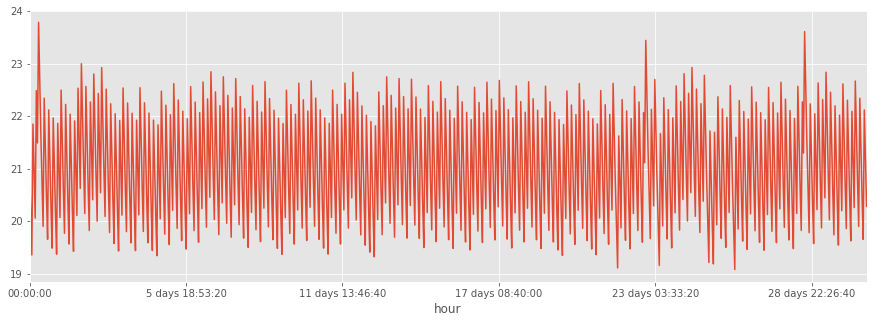

In [28]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-2]
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='h')

temperatures_df.index = temperatures_df['hour']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:,:].loc[:,'trained'].plot()
plt.savefig('data/output/DQN-Dyn-Price/eval.png',bbox_inches='tight')

## Dynamic outside parameters

In [3]:
rewards = pkl.load(open('data/output/DQN-Dyn-Weather/2710092_dynamic_True_rewards_dqn.pkl', "rb"))

In [4]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 2}

In [4]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [6]:
r = rewards_df.fillna(rewards_df.mean())

In [7]:
moving_avg = r.rolling(window=10).mean()

Text(0.5, 0, 'Episode')

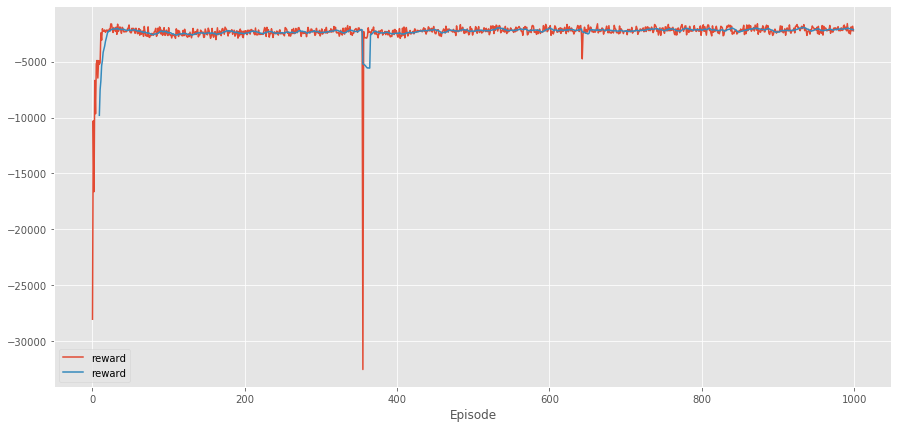

In [8]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

In [10]:
temperatures = pkl.load(open('data/output/DQN-Dyn-Weather/2622882_dynamic_True_temperatures_dqn.pkl', "rb"))

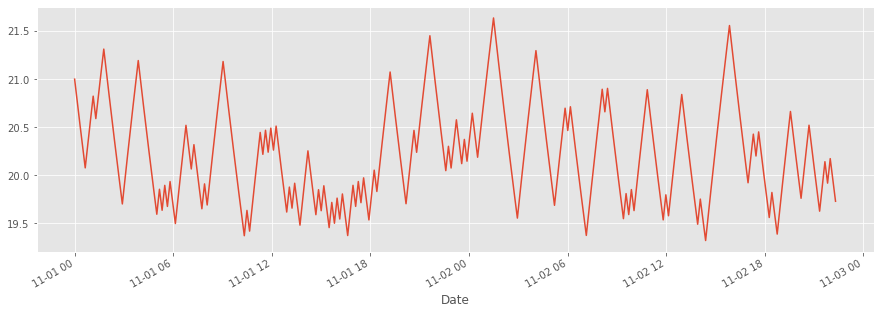

In [33]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-3]
temperatures_df['Date'] = pd.date_range(start='2014-11-01',end='2014-12-01', periods=len(temperatures_df['trained']))

temperatures_df.index = temperatures_df['Date']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:48*6,:].loc[:,'trained'].plot()

In [11]:
temperatures[-1]

{'NUM_EPISODES': 2000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.0001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 2}

### Evaluation on January

In [2]:
eval_data = pkl.load(open('data/output/DQN-Dyn-Weather/Dyn_Weather_eval.pkl', 'rb'))
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

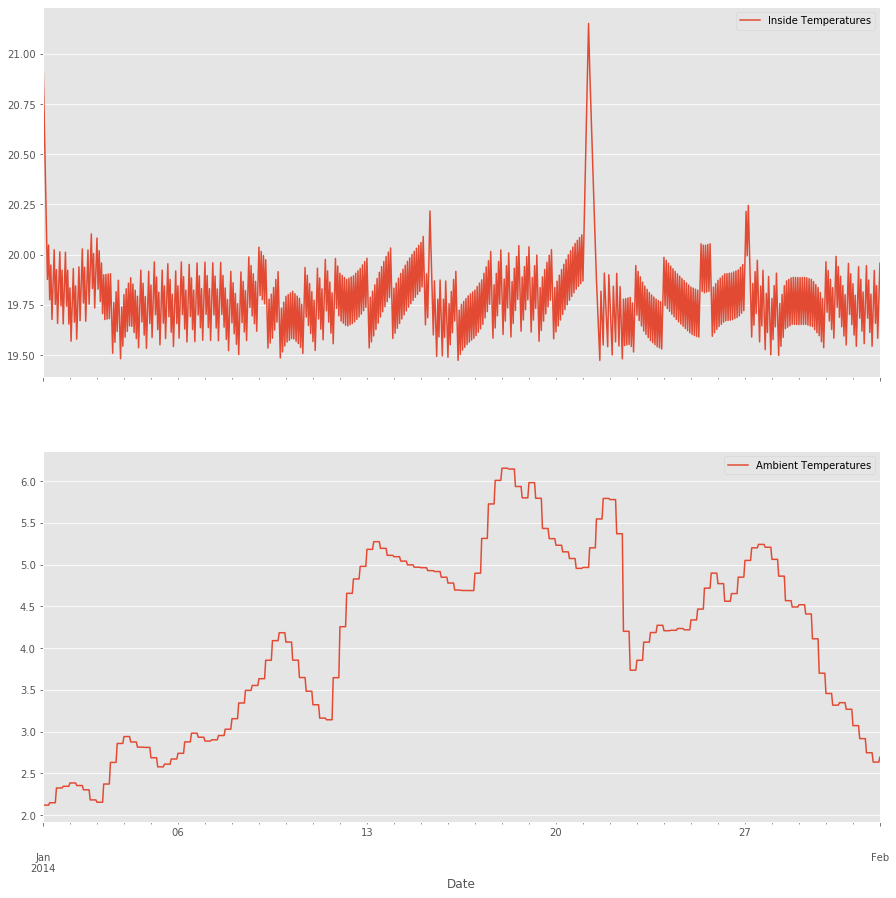

In [4]:
fig, axs = plt.subplots(2,figsize=(15,15), sharex=True)

eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
plt.savefig('data/output/DQN-Dyn-Weather/EvalSingleWeather.png',bbox_inches='tight')

### With Dynamic price

In [2]:
rewards = pkl.load(open('data/output/DQN-Dyn-Price/2906093_dynamic_True_rewards_dqn.pkl', "rb"))

In [3]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 10}

In [4]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [5]:
r = rewards_df.fillna(rewards_df.mean())

In [6]:
moving_avg = r.rolling(window=10).mean()

In [7]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

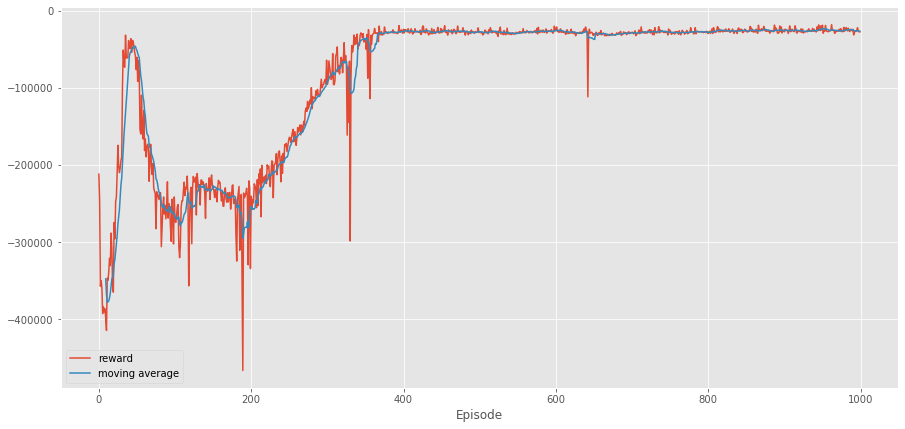

In [9]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_dynamic_dqn.png')

In [11]:
temperatures = pkl.load(open('data/output/DQN-Dyn-Price/2906093_dynamic_True_temperatures_dqn.pkl', "rb"))

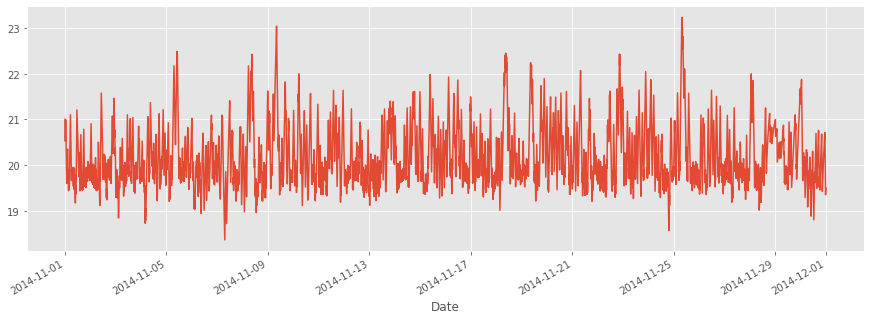

In [12]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-2]
temperatures_df['Date'] = pd.date_range(start='2014-11-01',end='2014-12-01', periods=len(temperatures_df['trained']))

temperatures_df.index = temperatures_df['Date']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:,:].loc[:,'trained'].plot()
#plt.savefig('data/output/temperatures_dynamic_dqn.png')

### Evaluation on January

In [11]:
eval_data = pkl.load(open('data/output/DQN-Dyn-Price/Dyn_Price_HighComfort_eval.pkl', 'rb'))

In [12]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [13]:
eval_data

,Inside Temperatures,Ambient Temperatures,Prices,Actions,Rewards,Date
Date,,,,,,
2014-01-01 00:00:00,21.000000,2.118,15.15,0.0,0.000000,2014-01-01 00:00:00
2014-01-01 00:10:00,20.712611,2.118,15.15,0.0,-0.000000,2014-01-01 00:10:00
2014-01-01 00:20:00,20.429595,2.118,15.15,0.0,-0.000000,2014-01-01 00:20:00
2014-01-01 00:30:00,20.150888,2.118,15.15,0.0,-0.000000,2014-01-01 00:30:00
2014-01-01 00:40:00,19.876422,2.118,15.15,0.0,-0.000000,2014-01-01 00:40:00
...,...,...,...,...,...,...
2014-01-31 23:20:00,19.630548,-2.473,31.67,1.0,-10.556667,2014-01-31 23:20:00
2014-01-31 23:30:00,19.690605,-2.473,31.67,1.0,-10.556667,2014-01-31 23:30:00
2014-01-31 23:40:00,19.749748,-2.473,31.67,1.0,-10.556667,2014-01-31 23:40:00


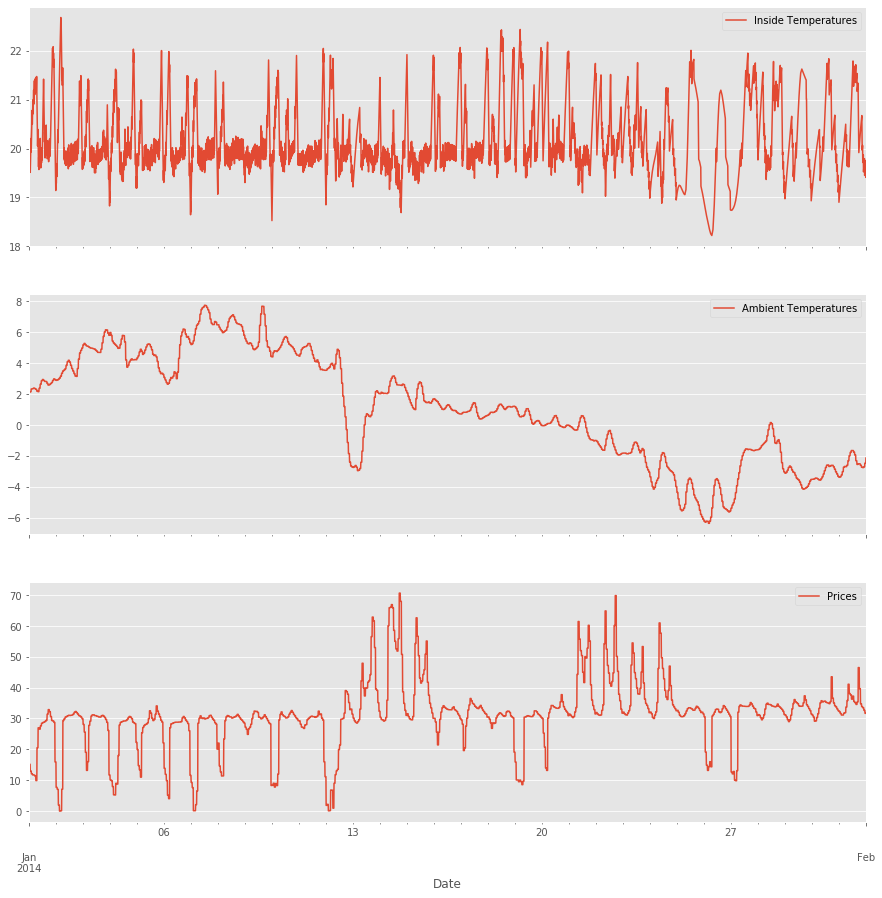

In [15]:
fig, axs = plt.subplots(3,figsize=(15,15), sharex=True)

zoomed_in = eval_data.iloc[:1008,:] # Taking first week for nicer visualization
eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
eval_data['Prices'].plot(ax=axs[2], legend=True)
plt.savefig('data/output/DQN-Dyn-Price/eval.png',bbox_inches='tight')

# DDPG

In [77]:
rewards = pkl.load(open('data/output/DDPG/3238021_dynamic_True_rewards_dqn.pkl', "rb"))

In [78]:
rewards[-1]

{'NUM_EPISODES': 4000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE_ACTOR': 0.0001,
 'LEARNING_RATE_CRITIC': 0.001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 8,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 24,
 'COMFORT_PENALTY': 10,
 'MEMORY_SIZE': 144000}

In [79]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [80]:
r = rewards_df.fillna(rewards_df.mean())

In [81]:
moving_avg = r.rolling(window=10).mean()

In [82]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

Text(0.5, 0, 'Episode')

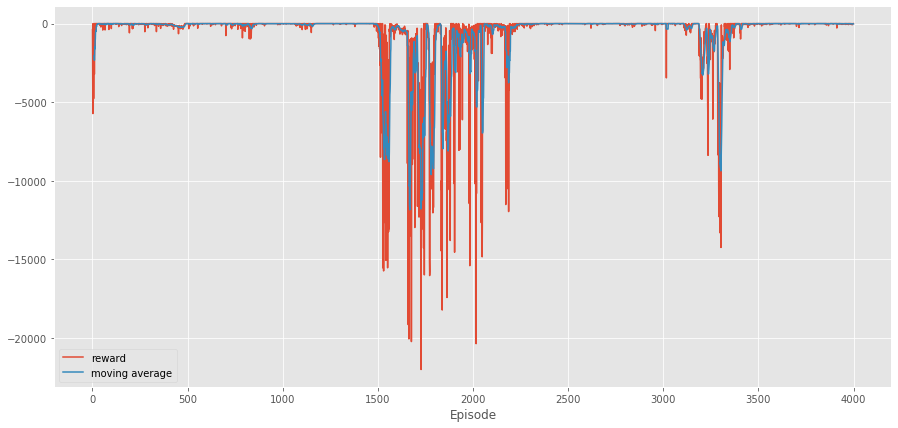

In [83]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

In [13]:
eval_data = pkl.load(open('data/output/DDPG/DDPG_eval_eval.pkl', 'rb'))

In [14]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']
eval_data['Power'] = eval_data['Actions']*2000

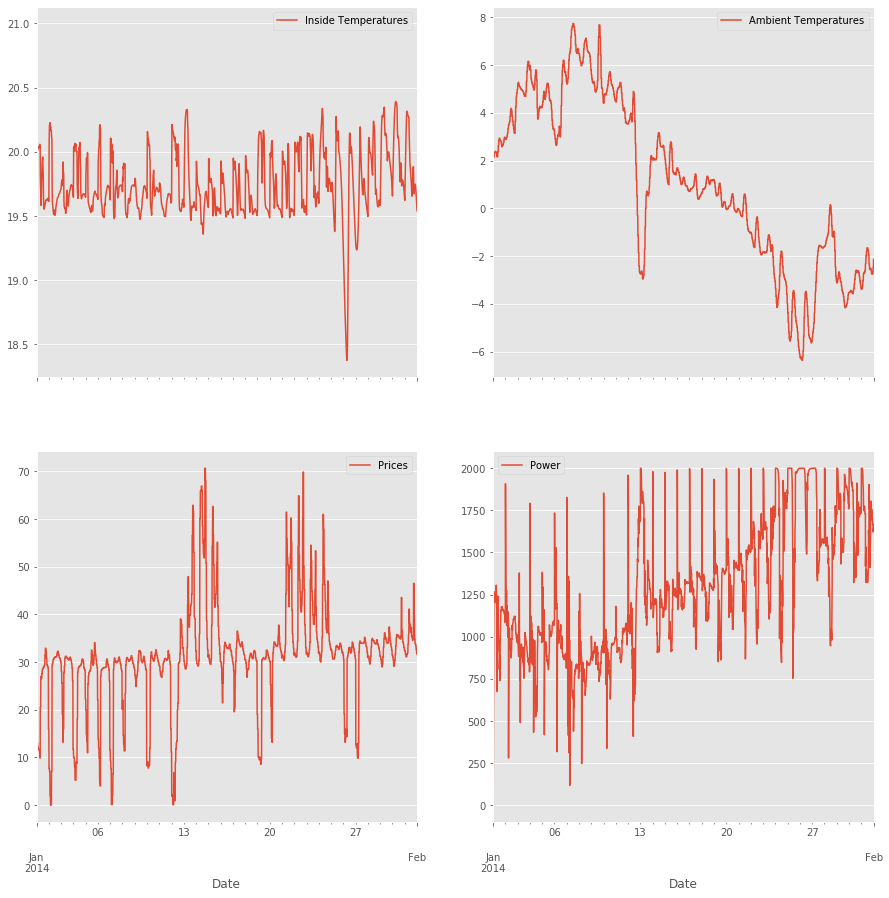

In [20]:
fig, axs = plt.subplots(3,figsize=(15,15) , sharex=True)

eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
eval_data['Prices'].plot(ax=axs[2], legend=True)
#plt.savefig('data/output/DDPG/DDPG_eval.png',bbox_inches='tight')

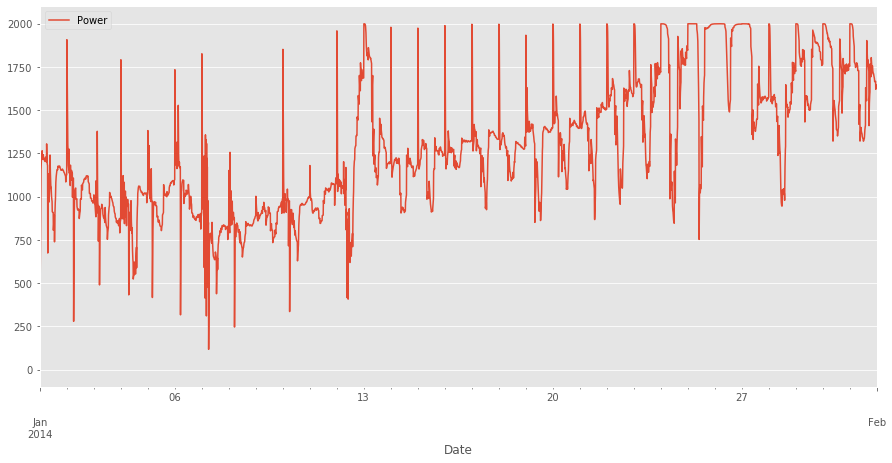

In [18]:
f, ax = plt.subplots(figsize=(15,7))
eval_data['Power'].plot(ax=ax, legend=True)
plt.savefig('data/output/DDPG/Power_profile_ddpg.png',bbox_inches='tight')

In [87]:
costs_ddpg = sum(2000*eval_data['Prices']/1e6*eval_data['Actions']*10*60/3600)

In [88]:
costs_ddpg

30.172001754492214

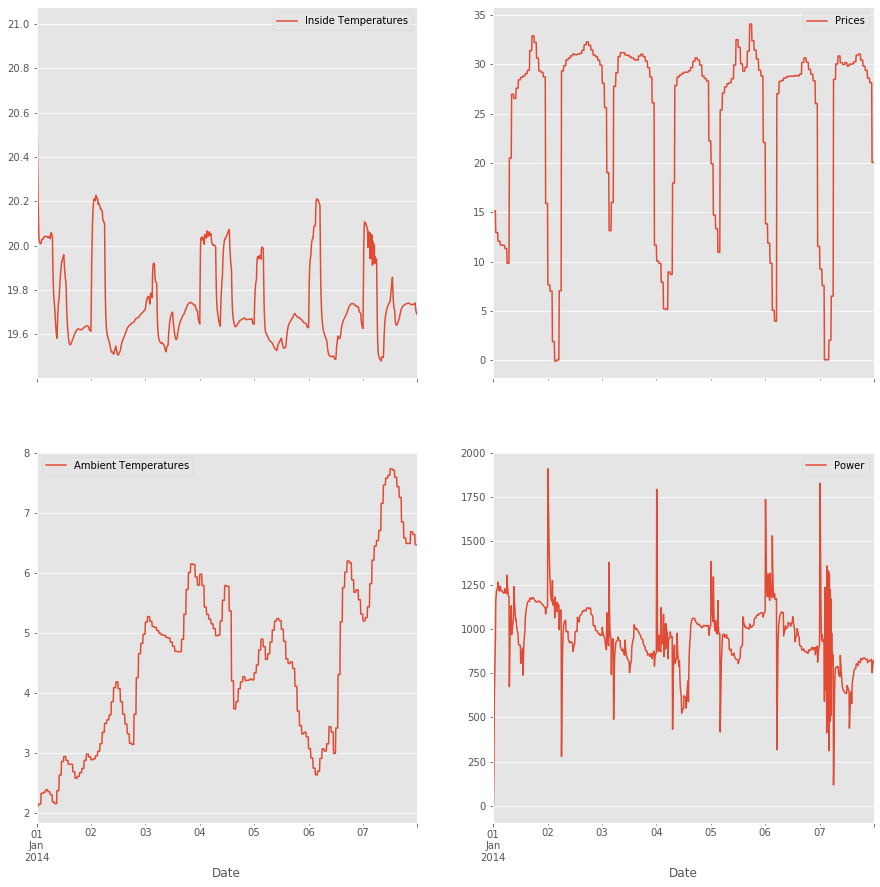

In [27]:
fig, axs = plt.subplots(2,2,figsize=(15,15), sharex=True)

zoomed_in = eval_data.iloc[:1008,:] # Taking first week for nicer visualization
zoomed_in['Inside Temperatures'].plot(ax=axs[0][0], legend=True)
zoomed_in['Ambient Temperatures'].plot(ax=axs[1][0], legend=True)
zoomed_in['Prices'].plot(ax=axs[0][1], legend=True)
zoomed_in['Power'].plot(ax=axs[1][1], legend=True)
plt.savefig('data/output/DDPG/eval_zoomed.png',bbox_inches='tight')

In [5]:
eval_data['Prices_kWh']=eval_data['Prices']/1000

In [22]:
sum(eval_data['Actions'])

2882.0

In [17]:
costs_dqn = sum(2000*eval_data['Prices']/1e6*eval_data['Actions']*10*60/3600)

In [18]:
costs_dqn

30.723966666666747

### Basic Controller on January

In [4]:
costs = pkl.load(open('data/output/DQN-Dyn-Price/dyn_prices_costs_basic.pkl', 'rb'))

In [6]:
sum(costs)

32.43607666666674

# Comparing performances

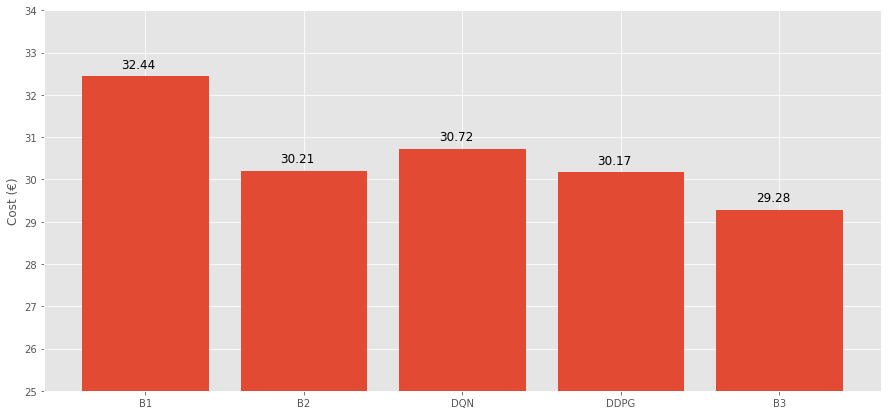

In [9]:
import numpy as np
basic_controller_cost = 32.43607666666674 # Based on previous analysis
binary_lp_cost = 30.205400000000264 # The binary linear programming problem
dqn_cost = 30.723966666666747 # Costs obtained with DQN
ddpg_cost = 30.172001754492214 # The costs obtained with DDPG
lp_cost = 29.278686824876633 # The continuous LP problem
labels_values = np.round(np.array([basic_controller_cost,binary_lp_cost, dqn_cost, ddpg_cost, lp_cost]), decimals=2)
costs = labels_values - 25
labels = ['B1', 'B2', 'DQN', 'DDPG', 'B3']


N=5
ind = np.arange(N)
f, ax = plt.subplots(figsize=(15,7))
ax.bar(ind, costs, bottom=25)
#moving_avg.plot(ax=ax)
ax.set_ylabel('Cost (€)')
ax.set_yticks(np.arange(25, 35, 1))
#ax.set_title('Cost incurred by the different solutions')
for i, v in enumerate(labels_values):
    ax.text(i-0.15, 
              v+0.2, 
              v, 
              fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(labels)
plt.savefig('data/output/comparing_solutions_dyn_prices.png',bbox_inches='tight')

In [7]:
np.arange(25, 35, 1)

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

# With storage capacity

In [136]:
rewards = pkl.load(open('data/output/DDPG_storage/6422244_dynamic_True_rewards_dqn.pkl', "rb"))

In [137]:
rewards[-1]

{'NUM_EPISODES': 3000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE_ACTOR': 0.0001,
 'LEARNING_RATE_CRITIC': 0.001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 120,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 24,
 'COMFORT_PENALTY': 10,
 'MEMORY_SIZE': 24000,
 'ETA_BATTERY': 1}

In [138]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [139]:
r = rewards_df.fillna(rewards_df.mean())

In [140]:
moving_avg = r.rolling(window=10).mean()

In [141]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

Text(0.5, 0, 'Episode')

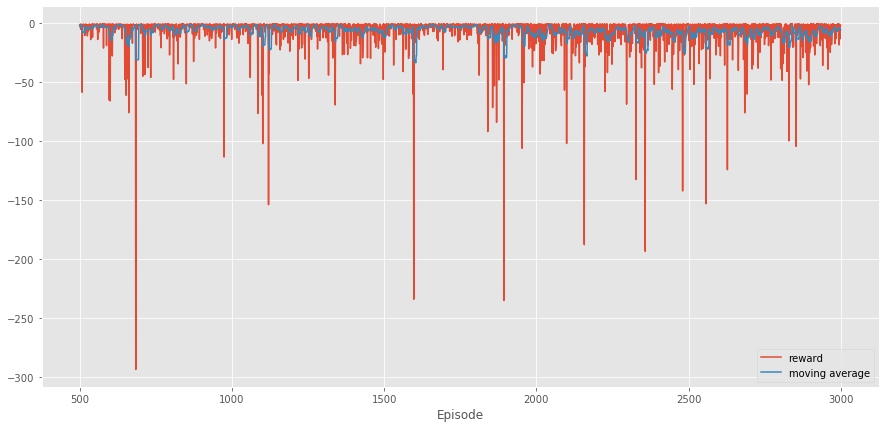

In [143]:
f, ax = plt.subplots(figsize=(15,7))
r.iloc[500:,:].plot(ax=ax)
moving_avg.iloc[500:,:].plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

## Evaluation on January

In [104]:
eval_data = pkl.load(open('data/output/DDPG_storage/DDPG_storage_eval.pkl', 'rb'))

In [105]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [106]:
eval_data

,Inside Temperatures,Ambient Temperatures,Prices,Actions,Rewards,Storage,Power,Date
Date,,,,,,,,
2014-01-01 00:00:00,21.000000,2.118,15.15,"[0, 0]",0.000000,1000,0.000000,2014-01-01 00:00:00
2014-01-01 01:00:00,19.490869,2.147,15.15,"[0.08128074, 0.9999918]",-0.138183,2612,0.002913,2014-01-01 01:00:00
2014-01-01 02:00:00,19.703293,2.324,12.96,"[0.67800605, 0.99916834]",-0.037970,4000,0.002817,2014-01-01 02:00:00
2014-01-01 03:00:00,19.685787,2.344,12.09,"[0.59013224, 0.09129007]",-0.014269,4000,0.001180,2014-01-01 03:00:00
2014-01-01 04:00:00,19.685123,2.384,11.70,"[0.594915, -0.68732595]",0.005484,2011,-0.000700,2014-01-01 04:00:00
...,...,...,...,...,...,...,...,...
2014-01-31 20:00:00,19.736558,-2.735,34.77,"[0.93209374, -0.9999994]",-0.064818,400,0.001864,2014-01-31 20:00:00
2014-01-31 21:00:00,19.588889,-2.760,33.85,"[0.8057724, -1.0]",-0.054551,400,0.001612,2014-01-31 21:00:00
2014-01-31 22:00:00,19.595826,-2.714,33.46,"[0.86698306, -1.0]",-0.058019,400,0.001734,2014-01-31 22:00:00


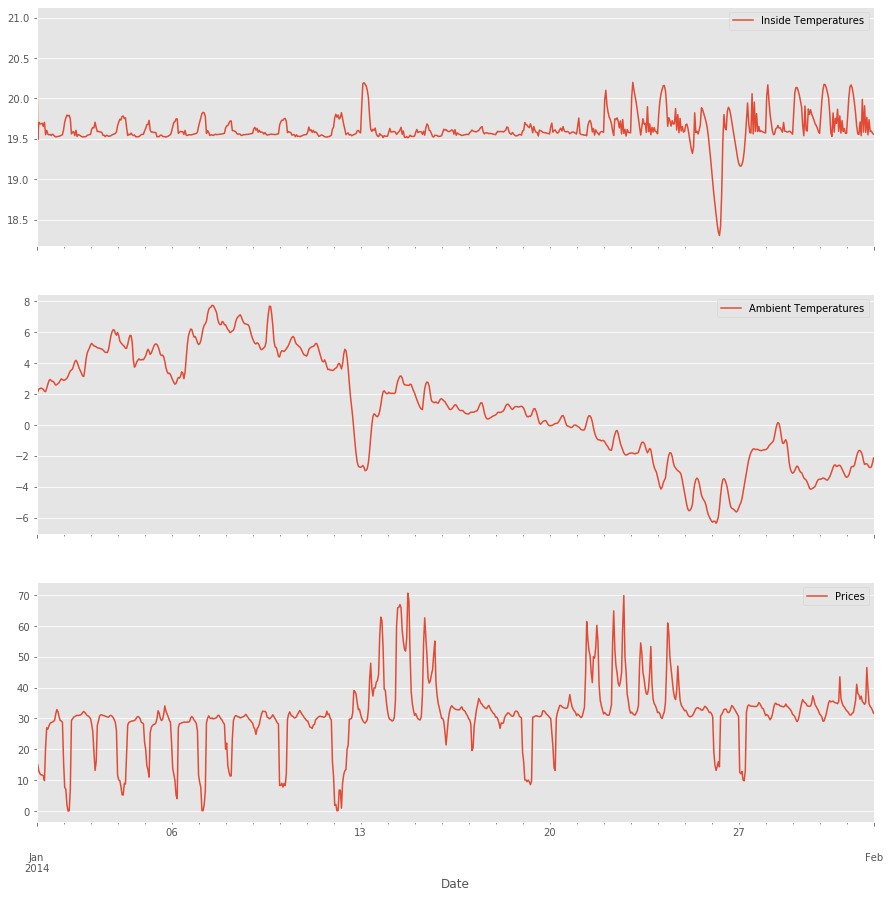

In [107]:
fig, axs = plt.subplots(3,figsize=(15,15), sharex=True)

eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
eval_data['Prices'].plot(ax=axs[2], legend=True)
plt.savefig('data/output/DDPG_storage/DDPG_storage_eval.png',bbox_inches='tight')

In [108]:
costs_ddpg = sum(eval_data['Prices']*eval_data['Power'])

In [109]:
costs_ddpg

29.909655542042938

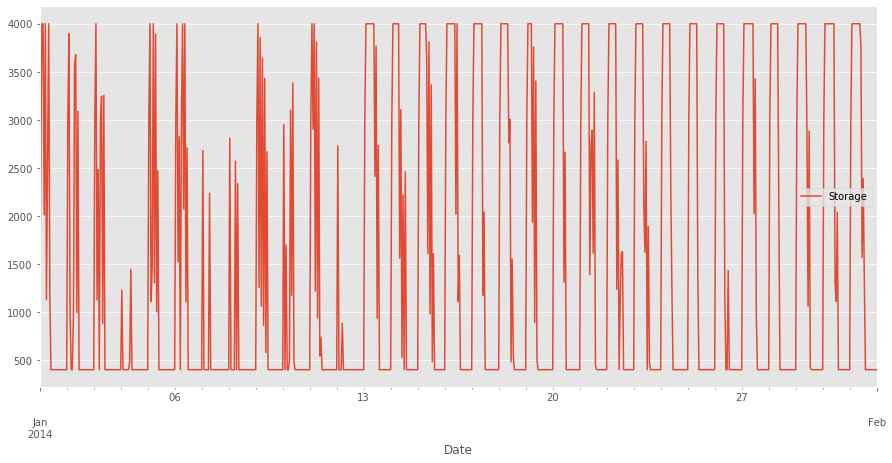

In [110]:
f, axs = plt.subplots(figsize=(15,7)) #nrows=1, ncols=2,
eval_data['Storage'].plot(ax=axs, legend=True)
#eval_data['Power from grid(W)'] = eval_data['Power']*1e6
#eval_data['Power from grid(W)'].plot(ax=axs[1], legend=True)
#plt.savefig('data/output/DDPG_storage/DDPG_storage_power_profile.png',bbox_inches='tight')

## Policy Evaluation

In [52]:
policy_data = pkl.load(open('data/output/DDPG_storage/DDPG_storagepolicy_eval.pkl', 'rb'))

In [53]:
policy_data[policy_data['Actions'] >= 0]

,Inside Temperatures,Ambient Temperatures,Battery Level,Prices,Actions,Sun Power
0,19,-10,400,0,0.999969,0
1,19,-10,400,0,0.999927,10
2,19,-10,400,0,0.999822,20
3,19,-10,400,0,0.999549,30
4,19,-10,400,0,0.998843,40
...,...,...,...,...,...,...
6613351,24,-6,700,34,0.166340,10
6613352,24,-6,700,34,0.134755,20
6613353,24,-6,700,34,0.070855,30
6613401,24,-6,800,34,0.031490,10


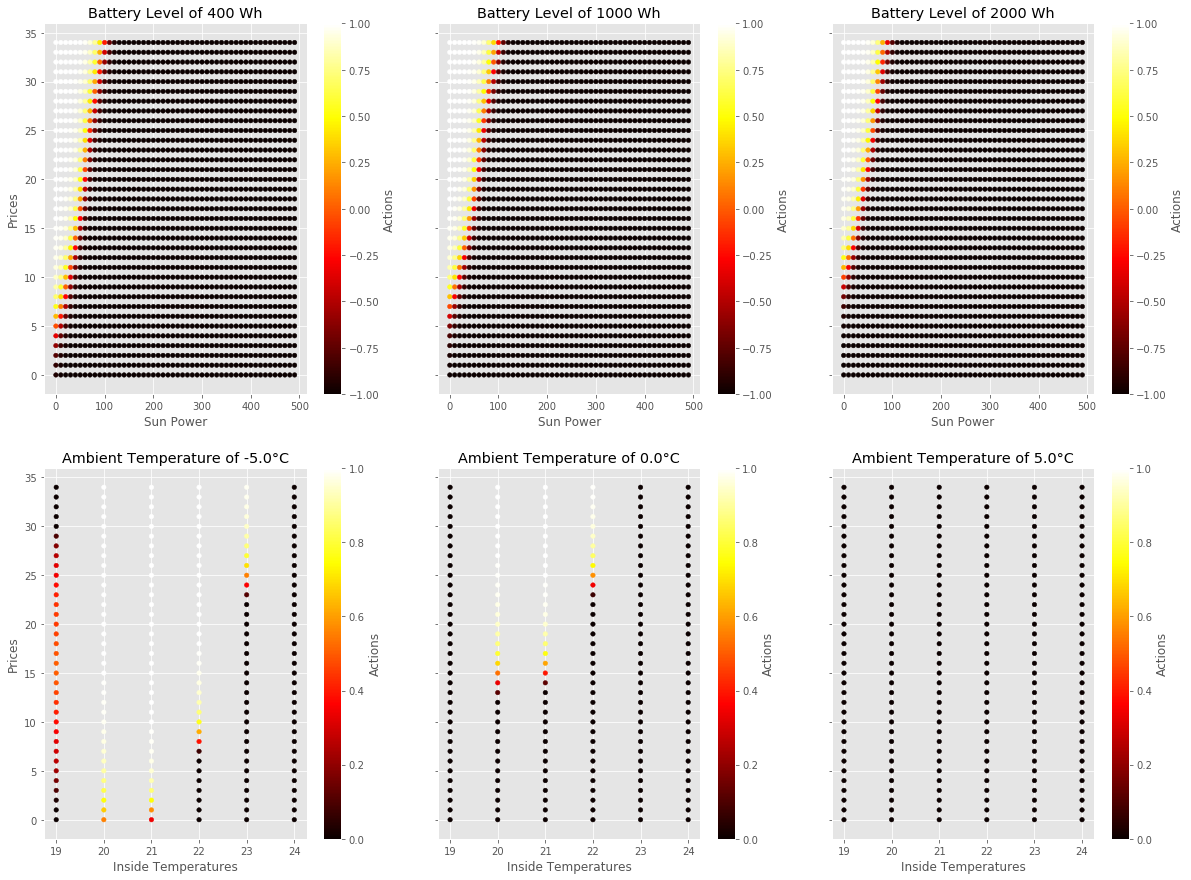

In [54]:
import numpy as np
fig, axs = plt.subplots(2,3,figsize=(20,15), sharey=True)

selected_battery_levels = [400,1000, 2000]

for i in range(3):
    selected = policy_data[(policy_data['Battery Level'] == selected_battery_levels[i]) &(policy_data['Inside Temperatures'] == 20)& (np.round(policy_data['Ambient Temperatures'],1) == 5) ]
    selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    axs[0][i].set_title('Battery Level of {} Wh'.format(selected_battery_levels[i]))
    
selected_temperatures = [-5., 0., 5.]

for i in range(3):
    selected = policy_data[(policy_data['Sun Power'] == 100) &(policy_data['Battery Level'] == 1000) & (np.round(policy_data['Ambient Temperatures'],1) == selected_temperatures[i])]
    selected.plot.scatter(x='Inside Temperatures', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=0, vmax=1)
    axs[1][i].set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]))
    
#fig.colorbar(ims[0], ax=axs)
#plt.savefig('data/output/DDPG/DDPG_policy_eval.png',bbox_inches='tight')

## Comparing against LP

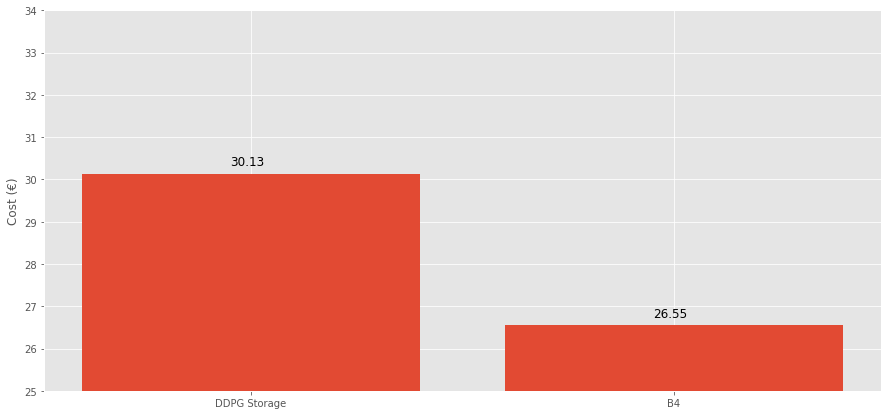

In [29]:
import numpy as np
storage_cost = 30.12609476634605
LP_optimal_solution = 26.55489972445432
labels_values = np.round(np.array([storage_cost,LP_optimal_solution]), decimals=2)
costs = labels_values - 25
labels = ['DDPG Storage', 'B4']


N=2
ind = np.arange(N)
f, ax = plt.subplots(figsize=(15,7))
ax.bar(ind, costs, bottom=25)
#moving_avg.plot(ax=ax)
ax.set_ylabel('Cost (€)')
ax.set_yticks(np.arange(25, 35, 1))
#ax.set_title('Cost incurred by the different solutions')
for i, v in enumerate(labels_values):
    ax.text(i-0.05, 
              v+0.2, 
              v, 
              fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(labels)
plt.savefig('data/output/DDPG_storage/comparing_ddpg_vs_lp.png',bbox_inches='tight')